# Giới thiệu bài toán và set up data

## Mục tiêu

Sử dụng hai thuật toán Decision tree và Naïve Bayes xây dựng trên tập dữ liệu: Dudoanthuoc.csv, để dự đoán loại thuốc thích hợp với dữ liệu của bệnh nhân cụ thể 

## Set up data

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('./drive/MyDrive/Code nhập môn AI/C_BTnhom/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
df= pd.read_csv('DuDoanThuoc.csv')
df= pd.DataFrame(df)
df1= pd.read_csv('DuDoanThuoc.csv')
df1= pd.DataFrame(df1)

In [ ]:
df.dropna(inplace=True)# Cho Decision Tree và Bayesian Categorical
df1.dropna(inplace=True)# Cho Bayesian Gausian

# Sử dụng Decision Tree

## Set up dữ liệu train, test

In [ ]:
from sklearn import preprocessing

In [ ]:
# Encode
string_to_int= preprocessing.LabelEncoder()
df_encode=df[['Sex','BP','Cholesterol','Drug']].apply(string_to_int.fit_transform)
str_cols= ['Sex','BP','Cholesterol','Drug']
for feature in df_encode:
  df[feature]= df_encode[feature]
  df1[feature]= df_encode[feature]

In [ ]:
# Phân tổ thuộc tính định lượng Age và Na_to_K
df.Age[df['Age']<=40]=0 # 45
df.Age[df['Age']>40]=1
df.Na_to_K[df['Na_to_K']<=20]= 0 
df.Na_to_K[df['Na_to_K']>20]=1

<ipython-input-7-625cb76c2832>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df['Age']<=40]=0 # 45
<ipython-input-7-625cb76c2832>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df['Age']>40]=1
<ipython-input-7-625cb76c2832>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Na_to_K[df['Na_to_K']<=20]= 0
<ipython-input-7-625cb76c2832>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df.drop(columns=['Drug']),df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Giá trị Entropy theo Drug (E(S)).




In [ ]:
# Tính tần suất các phân lớp
n_S= df.value_counts('Drug')
n_S

Drug
4    91
3    54
0    23
1    16
2    16
dtype: int64

In [ ]:
# Tính xác suất các phân lớp
p_S=n_S/len(df)
p_S

Drug
4    0.455
3    0.270
0    0.115
1    0.080
2    0.080
dtype: float64

In [ ]:
# Tính Entropy(S)
Entropy_S= 0
for i in range( 5):
  Entropy_S=Entropy_S -p_S[ i]* math.log2( p_S[ i])
Entropy_S

1.968780377953625

**E(S)=1.968780377953625**

### Giá trị (Gain(S, Sex))


In [ ]:
# Tính xác suất các phân lớp
p_Sex=df.Sex.value_counts()/len(df)
p_Sex

1    0.52
0    0.48
Name: Sex, dtype: float64

In [ ]:
my_tab = pd.crosstab(df.Sex, df.Drug)
my_tab

Drug,0,1,2,3,4
Sex,,,,,
0,9,6,7,27,47
1,14,10,9,27,44


In [ ]:
# Xác suất phân lớp theo nhãn
n_F=[	9,	6, 7, 27,	47]
n_M= [	14,	10,	9,	27,	44]

In [ ]:
S1=my_tab.iloc[0]
a1=S1.values.sum()

S2=my_tab.iloc[1]
a2=S2.values.sum()

In [ ]:
p_F=n_F/a1

p_M=n_M/a2

In [ ]:
# Tính Entropy của các phân lớp
Entropy_F= 0
Entropy_M= 0
for i in range( 5):
  Entropy_F+= -p_F[ i]* math.log2(p_F[ i])
  Entropy_M+= -p_M[ i]* math.log2(p_M[ i])

In [ ]:
# Tính Gain của Sex
Gain_Sex_S= Entropy_S- p_Sex[0]*Entropy_F- p_Sex[1]*Entropy_M
Gain_Sex_S

0.007703482714548127

**Gain(S, Sex)= 0.007703482714548127**

### Các Giá trị Gain(S, thuộc tính) còn lại
 Tương tự Gain(S,Sex) ta có:
  
**Gain(S, Sex)= 0.007703482714548127**

**Gain(S,Age)=0.5113563934216977**

**Gain(S,BP)=0.9812083842555803**

**Gain(S,Cholesterol)=0.528074305110973**

**Gain(S,BP)=0.3750795686189372**

### Gốc Root của cây

**Gốc của cây có Entropy= 1.968780377953625 và bắt đầu phân chia theo thuộc tính BP**

## Xây dựng Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# xây dựng model
classifier = DecisionTreeClassifier(criterion="entropy", random_state=100)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

## Accuracy

In [ ]:
y_pred= classifier.predict(X_test) 

In [ ]:
#Accuracy
(y_test.values == y_pred).sum()/len(y_pred)

0.65

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.65


In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
148,0,0
99,4,4
178,3,4
155,0,4
160,3,3
152,0,0
36,3,3
47,3,3
156,3,3
40,3,3


## Confusion_matric

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
# Ma trận confusion 
print(confusion_matrix(y_test, y_pred))  
# Các thông số đánh giá model
print(classification_report(y_test, y_pred)) 

[[ 5  1  0  0  2]
 [ 3  4  0  0  0]
 [ 0  0  1  0  3]
 [ 0  0  0 13  6]
 [ 1  1  0  4 16]]
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.67      0.57      0.62         7
           2       1.00      0.25      0.40         4
           3       0.76      0.68      0.72        19
           4       0.59      0.73      0.65        22

    accuracy                           0.65        60
   macro avg       0.72      0.57      0.60        60
weighted avg       0.68      0.65      0.65        60



## Biểu diễn Decision Trees

In [ ]:
# XD mô hình kiểm tra kết quả với xtrain+ytrain= data, nsample=200
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
X, y = df.drop(columns=['Drug']),df['Drug']
#clf = clf.fit(X_train, y_train)
clf= clf.fit(X,y)

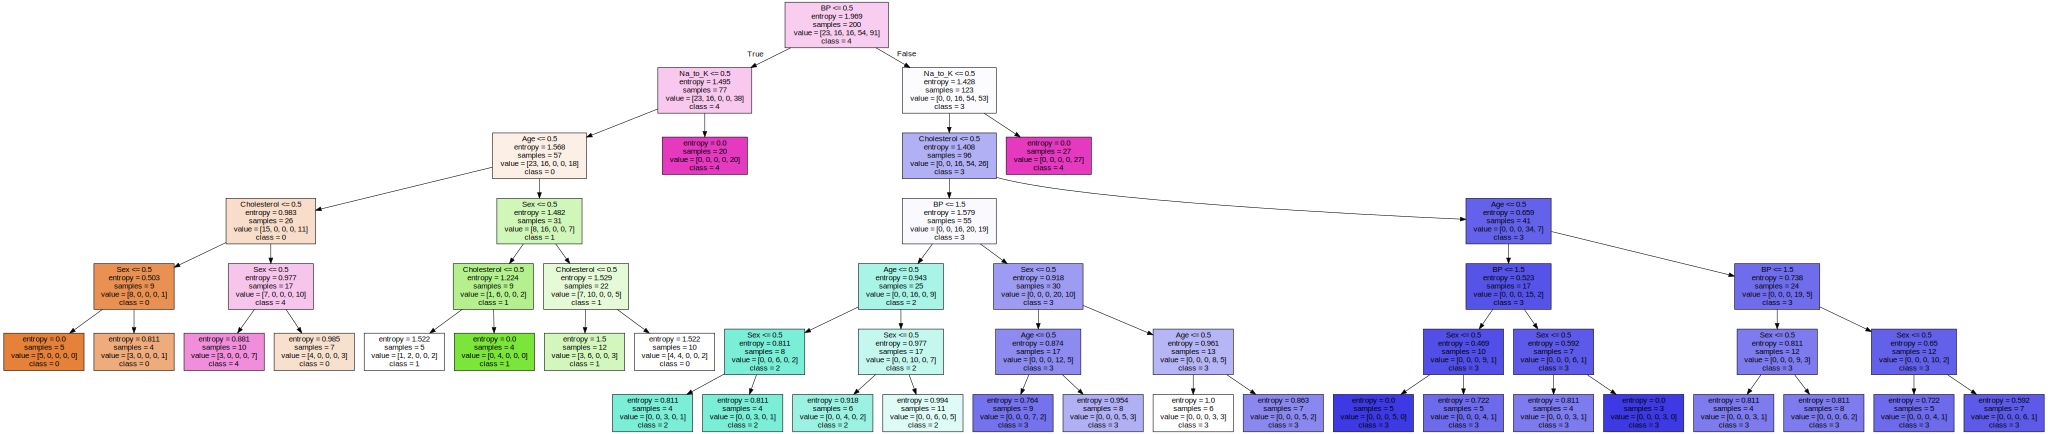

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
labels= [i for i in df.columns if i!='Drug']
target_names=['0','1','2','3','4']
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=labels, class_names=target_names
   , filled = True,))
display(SVG(graph.pipe(format='svg')))

Nhận xét:
**Gốc của cây có entropy và thuộc tính phân chia là BP bằng với kết quả quá trình tính toán ở trên**

# Sử dụng Naive Bayesian

### Công thức xác suất

In [ ]:
X_new= [0, 0, 2, 1, 0]

In [ ]:
p_Drug=df.Drug.value_counts()/len(df)
p_Drug

4    0.455
3    0.270
0    0.115
2    0.080
1    0.080
Name: Drug, dtype: float64

In [ ]:
name= [i for i in df.columns if i!='Drug']

In [ ]:
Pcx_Pc=[0,0,0,0,0]
for j in range(5):
  df0=df[df['Drug']==j]
  # Tính tích các Pci
  Pci=df0.Na_to_K[df0['Na_to_K']==X_new[4]].count()/df0.Na_to_K.count() # Lấy Pc4 làm giá trị ban đầu
  for i in range (4):
    feature=name[i]
    Pci= Pci*(df0[feature][df0[feature]==X_new[i]]).count()/df0[feature].count()
  # Tính Pcx_Pc
  Pcx_Pc[j]=Pci*p_Drug[j]

In [ ]:
Pcx_Pc

[0.0, 0.0, 0.0, 0.026234567901234577, 0.006256325541329876]

**Loại thuốc dự đoán cho bệnh nhân có nhãn 3 là DrugX**

### Navie Bayesian Categorical

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing

In [ ]:
model = CategoricalNB()

In [ ]:
model.fit(X_train,y_train)

CategoricalNB()

#### Dự đoán kết quả

In [ ]:
# Cho thông tin của bệnh nhân X sau: 22 tuổi, Nữ, BP: NORMAL, Cholesterol: NORMAL, Na to K: 11.037
X_new= [[0, 0, 2, 1, 0]]

In [ ]:
model.predict_proba(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"


array([[0.02498578, 0.00303694, 0.00337044, 0.66079464, 0.3078122 ]])

In [ ]:
model.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"


array([3])

#### Giá trị Accuracy

In [ ]:
y_pred= classifier.predict(X_test) 

In [ ]:
(y_test.values == y_pred).sum()/len(y_pred)

0.65

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.65


In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  

## Navie Bayesian GaussiaNB

In [ ]:
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,0,0,0,25.355,4
1,47.0,1,1,0,13.093,2
2,47.0,1,1,0,10.114,2
3,28.0,0,2,0,7.798,3
4,61.0,0,1,0,18.043,4


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
X, y = df1.drop(columns=['Drug']),df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model.fit(X_train,y_train)

GaussianNB()

### Accuracy

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
(y_test.values == y_pred).sum()/len(y_pred)

0.7833333333333333

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7833333333333333

In [ ]:
# Cho thông tin của bệnh nhân X sau: 22 tuổi, Nữ, BP: NORMAL, Cholesterol: NORMAL, Na to K: 11.037
X_new= [[0, 0, 2, 1, 0]]

In [ ]:
model.predict_proba(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.99988929e-01,
        1.10710673e-05]])

In [ ]:
model.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([3])